# Project - 6: Advertising Sales Channel Prediction

 ## Goal: Predict the total sales generated from all the sales channel.  

## Importing the libraries:

In [1]:
 import pandas as pd
import numpy as np

## Loading the dataset:

In [2]:
data = pd.read_csv('Advertising.csv')

In [3]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
# Setting the column 'unnamed: 0' as index
data = data.set_index('Unnamed: 0')

In [5]:
data

,TV,radio,newspaper,sales
Unnamed: 0,,,,
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


### Observation: Here we can see that there are 200 records or rows or entries and there are no null-values

## Checking the data types:

In [7]:
data.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

### Observation: Here we can see that there are no object or string data types so we can proceed and there is no need to handle them.

### Checking the nullvalues in the dataframe:

In [8]:
data.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [9]:
data.isnull().sum().sum()

0

## Statistical information of the data:

In [10]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### Observation: 
### 1) Here we can see that there is no gap between the "mean" and the "standard deviation" which may affect our model.
###            2) We can also find that the "min" value in the "radio" is "0" so better to check the row if any required                 information we can keep the column or we can delete it.

## Checking the value "0" in the column "radio":

In [11]:
(data['radio']==0).value_counts()

False    199
True       1
Name: radio, dtype: int64

In [12]:
data.loc[data["radio"]==0]

,TV,radio,newspaper,sales
Unnamed: 0,,,,
128,80.2,0.0,9.2,8.8


### Observation: Here we can see that there is '0' in radio column but in the other columns we have the information which may help us in the prediction of our model so we can neglect this value.

# Exploratory Data Analysis: 

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats 
import warnings
warnings.filterwarnings('ignore')

### Checking the correlation of the variables by plotting heatmap:

In [14]:
correlation = data.corr()

                 TV     radio  newspaper     sales
TV         1.000000  0.054809   0.056648  0.782224
radio      0.054809  1.000000   0.354104  0.576223
newspaper  0.056648  0.354104   1.000000  0.228299
sales      0.782224  0.576223   0.228299  1.000000


<AxesSubplot:>

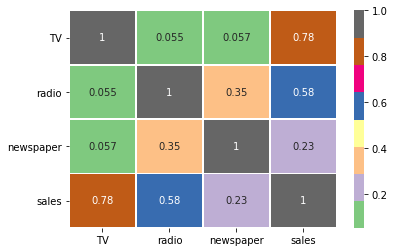

In [15]:
print(correlation)
sns.heatmap(correlation, cmap="Accent", annot=True, linewidth=0.7)

### Observation: Here we can see that there is high impact of 'TV-Ads' on the sales as the correlation map explains and then the 2nd place is the 'Radio-Ads' and the least effect is of 'Newspaper-Ads' and it is almost negligible.

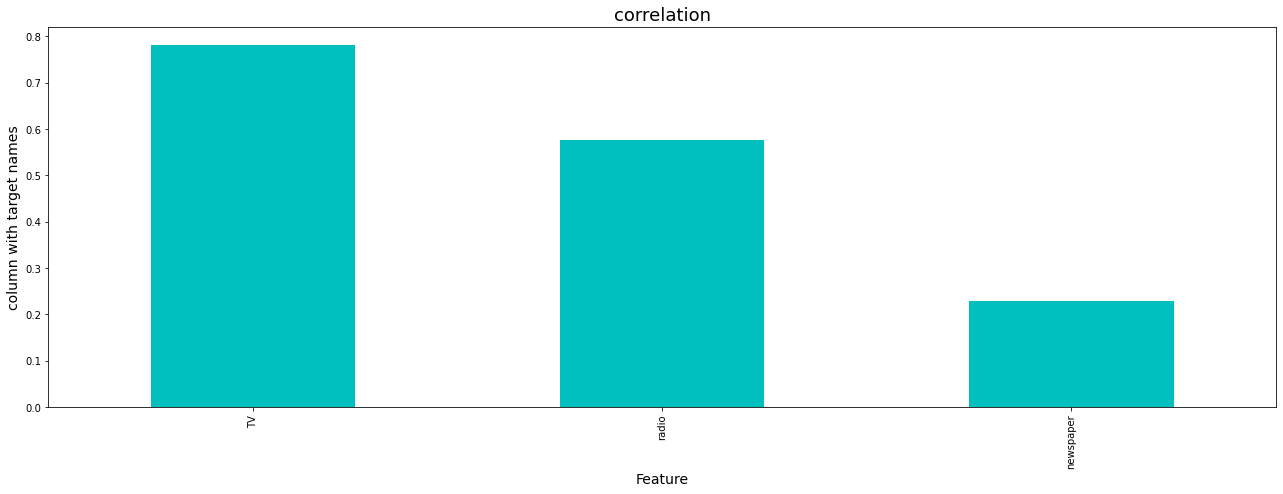

In [16]:
plt.figure(figsize=(22,7))
data.corr()['sales'].sort_values(ascending=False).drop(['sales']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

### Observation: Here we can see that the order of the effect on the sales by the features is :
### Tv > Radio > Newspaper.

# Visualization of the Data:

## Univariate analysis:

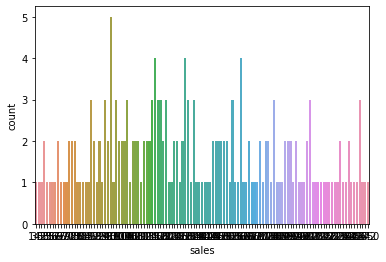

In [17]:
sns.countplot(data['sales']);

<AxesSubplot:xlabel='sales', ylabel='Density'>

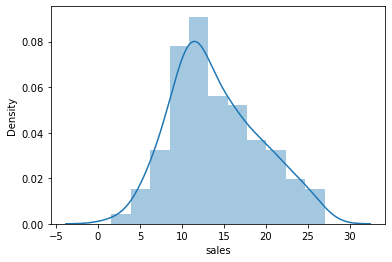

In [18]:
sns.distplot(data["sales"])

### Observation:
### 1) Here we can see that the data is almost "Normally Distributed".

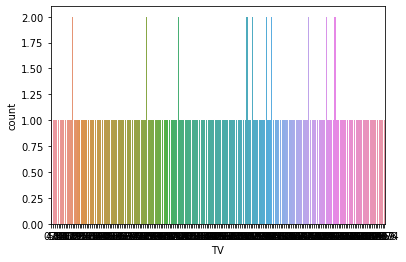

In [19]:
sns.countplot(data['TV']);

<AxesSubplot:xlabel='TV', ylabel='Density'>

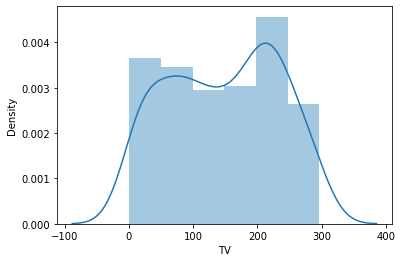

In [20]:
sns.distplot(data["TV"])

### Observation: 
### Here we can see that the data is somewhat normally distributed but the peak is divided into two.

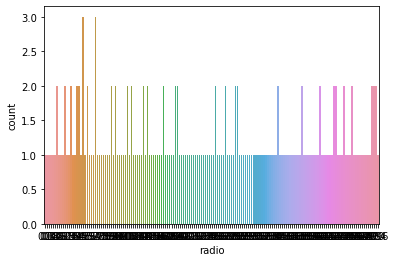

In [21]:
sns.countplot(data['radio']);

<AxesSubplot:xlabel='radio', ylabel='Density'>

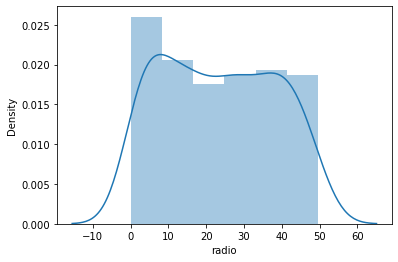

In [22]:
sns.distplot(data["radio"])

### Observation:
### Here we can see that the data is somewhat distributed normally but it can be seen that the graph is dividing broadly.

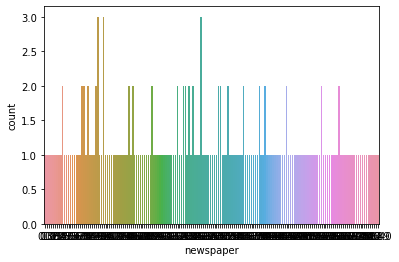

In [23]:
sns.countplot(data['newspaper']);

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

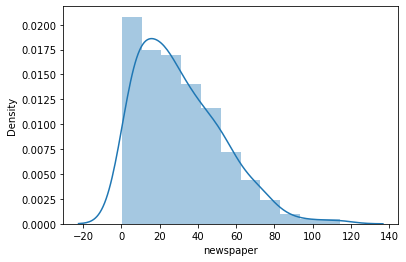

In [24]:
sns.distplot(data["newspaper"])

### Observation: 
### Here we can see that the data has "Leftskewness".

# Bivariate Analysis:

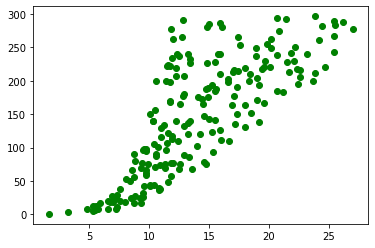

In [25]:
plt.scatter(x = 'sales', y = 'TV', data = data,c='g')

### Observation:
### Here we can see that 25 TV ads sales count are about 300.

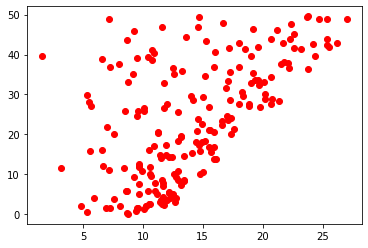

In [26]:
plt.scatter(x = 'sales', y = 'radio', data = data,c='r')

### Observation:
### Here we can see that 25 Radio-Ads sales count are only upto 50.

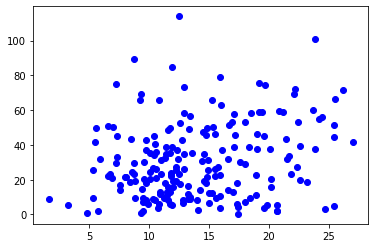

In [27]:
plt.scatter(x = 'sales', y = 'newspaper', data = data,c='b')

### Observation: 
### Here we can see that there is less count at 25 Newspaper-Ads and 10 - 15 ads count range between 10 to 20.

# Multivariate Analysis:

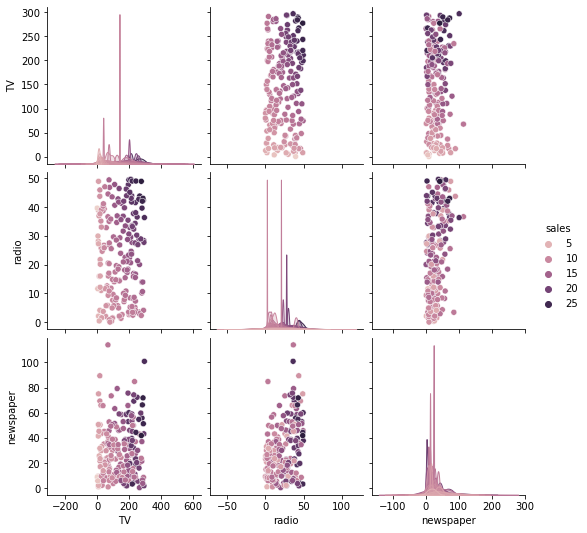

In [28]:
# visualizing the pairwise relation in the dataset:

sns.pairplot(data,hue="sales")

### Observation:
### Here we can see that there is high correlation between TV and Radio.

# Detecting the Outliers:

<AxesSubplot:>

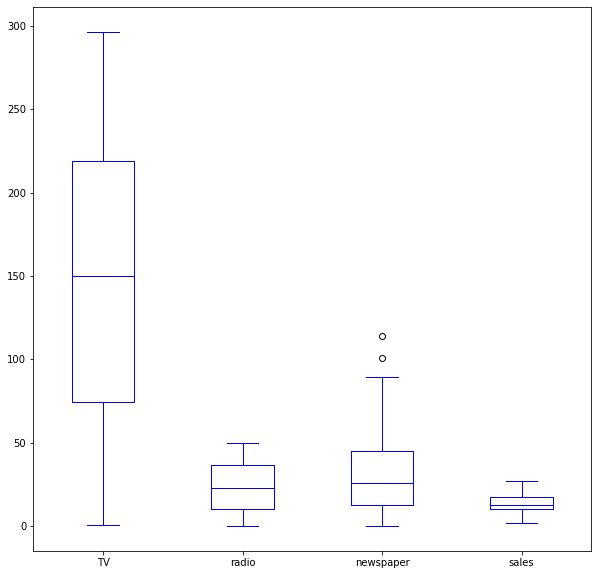

In [29]:
data.plot(kind="box", figsize = (10,10), color="b")

### Observation: 
### 1) Here we can see that there are no outliers in 'TV', 'Radio', 'Sales'  Boxplots.
### 2) But there are 2 outliers present in 'Newspaper' Boxplot, now we have to treat those outliers.

# Treating/Removing Outliers:

Method - 1: Z-Score method

In [30]:
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [31]:
feature = data[['newspaper']]

In [32]:
import scipy as stats

from scipy.stats import zscore

In [33]:
z=np.abs(zscore(feature))

data_new = data[(z<3).all(axis = 1)]

In [34]:
data_new

,TV,radio,newspaper,sales
Unnamed: 0,,,,
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8


In [35]:
print(data.shape)

(200, 4)


In [36]:
print(data_new.shape)

(198, 4)


### Observation:
### Here we can see that by applying the Z-Score method we have reduced 2 rows from the original data

## checking the data loss:

In [37]:
data_loss = (200-198)/200*100

In [38]:
data_loss

1.0

### Observation:
### Here we can see that the percentage of the Data Loss is 1% and that is Negligible.

## Method - 2: IQR Method:

In [39]:
# Inter Quantile Method:

Q1 = feature.quantile(0.25)  # 1st quantile

Q3 = feature.quantile(0.75)  # 3rd quantile

IQR = Q3-Q1

data_removed = data[~((data <(Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis = 1)]

In [40]:
data.shape

(200, 4)

In [41]:
data_removed.shape

(198, 4)

## Checking the data loss:

In [42]:
data_loss = (200-198)/200*100

In [43]:
data_loss

1.0

### Observation:
### By this we can say that there is no change in loss% in both of these methods so we can consider any of these.

In [44]:
data = data_removed

In [45]:
data

,TV,radio,newspaper,sales
Unnamed: 0,,,,
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8


{'whiskers': [<matplotlib.lines.Line2D at 0x1460b8188e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1460b818fa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1460b818580>],
 'medians': [<matplotlib.lines.Line2D at 0x1460b8256a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1460b825a00>],
 'means': []}

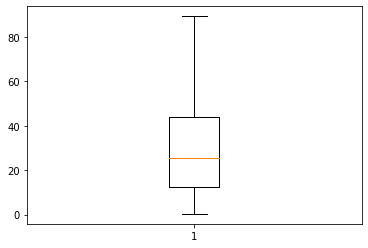

In [46]:
# Checking whether our outliers in the column "newspaer" are treated or not:

plt.boxplot(data['newspaper'])

### Observation:
### Here we can see that our outliers which were observed previously are treated now and now we dont have any outliers and we can proceed with our model.new_df.skew()


# Checking for skewness:

In [47]:
data.shape

(198, 4)

In [48]:
data.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

### Observation: 
### Here we can see that only "newspaper" has skewness and we have to treat it.

# Removing Skewness:

## Using yeo-johnson method(using 'power transformer')

In [49]:
feature = ["newspaper"]

In [50]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [51]:
data_removed[feature] = scaler.fit_transform(data_removed[feature].values)
data_removed[feature]

,newspaper
Unnamed: 0,
1,1.604196
2,0.831044
3,1.607052
4,1.283768
5,1.280622
...,...
196,-0.687435
197,-1.146090
198,-1.314437


In [52]:
# Now let's check the skewness after applying yeo-johnson method.

data_removed.skew()

TV          -0.082332
radio        0.114842
newspaper   -0.101288
sales        0.407130
dtype: float64

### Observation:
### Here we can see that the skewness has been removed in the column "newspaper".

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

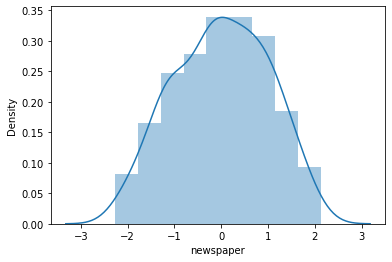

In [53]:
# # After removing skewness,now let's check how the data has been distributed in the column "newspaper".

sns.distplot(data_removed["newspaper"])

### Observation:
### Here we can see that the Graph is Distributed Normally as the skewness is removed.

In [54]:
new_df = data_removed
new_df

,TV,radio,newspaper,sales
Unnamed: 0,,,,
1,230.1,37.8,1.604196,22.1
2,44.5,39.3,0.831044,10.4
3,17.2,45.9,1.607052,9.3
4,151.5,41.3,1.283768,18.5
5,180.8,10.8,1.280622,12.9
...,...,...,...,...
196,38.2,3.7,-0.687435,7.6
197,94.2,4.9,-1.146090,9.7
198,177.0,9.3,-1.314437,12.8


### Observation:
### Here is our cleaned dataset without outliers and skewness

# Data preprocessing:

### Separating the independent and target variables into x and y:

In [55]:
x = new_df.drop("sales", axis=1)
y = new_df["sales"]

In [56]:
x

,TV,radio,newspaper
Unnamed: 0,,,
1,230.1,37.8,1.604196
2,44.5,39.3,0.831044
3,17.2,45.9,1.607052
4,151.5,41.3,1.283768
5,180.8,10.8,1.280622
...,...,...,...
196,38.2,3.7,-0.687435
197,94.2,4.9,-1.146090
198,177.0,9.3,-1.314437


#### 'x' is the data with only features

In [57]:
y

Unnamed: 0
1      22.1
2      10.4
3       9.3
4      18.5
5      12.9
       ... 
196     7.6
197     9.7
198    12.8
199    25.5
200    13.4
Name: sales, Length: 198, dtype: float64

#### 'y' is the data with only Label. 

# Scaling data with standard scaler:

In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,TV,radio,newspaper
0,0.978697,0.989521,1.604196
1,-1.199012,1.090705,0.831044
2,-1.519332,1.535913,1.607052
3,0.056456,1.225616,1.283768
4,0.400243,-0.831784,1.280622
...,...,...,...
193,-1.272932,-1.310720,-0.687435
194,-0.615864,-1.229773,-1.146090
195,0.355657,-0.932968,-1.314437
196,1.606431,1.272836,1.517395


# Model Building:

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Checking the random_state:

In [60]:
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = LinearRegression()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.9358346827439895  on Random_state  90


### Observation: 
### Here we got the accuracy as 93% for the random_state = 90

# splitting the data at the "maxRs" = 90:

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

### Observation: 
### Here we have given 70% of Data as Training and 30% as Testing.

# Regression Algorithms:

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.svm import SVR
#from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [63]:
# Checking r2score for Linear Regression
LR = LinearRegression()
LR.fit(x_train,y_train)

# prediction
predLR=LR.predict(x_test)
print('R2_score:',metrics.r2_score(y_test,predLR))

R2_score: 0.9358346827439895


### Observation:
### The R2 Score in Linear Regression is 93%

In [64]:
# Mean Absolute Error (MAE)

print(metrics.mean_absolute_error(y_test, predLR))

# Mean Squared Error (MSE)
print(metrics.mean_squared_error(y_test, predLR))

# Root Mean Squared Error (RMSE)
print(np.sqrt(metrics.mean_squared_error(y_test, predLR)))

1.029386786308399
1.5796296226361315
1.2568331721577575


### Observation:
### Here we can observe that MAE, MSE,RMSE are arount and between 1 to 1.5

# Random Forest Regressor:

In [65]:
#Checking R2 score for Random Forest Regressor:

RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)

# prediction
predRFR=RFR.predict(x_test)
print('R2_Score:',metrics.r2_score(y_test,predRFR))

R2_Score: 0.9704651803481718


In [66]:
# Mean Absolute Error (MAE)
print(metrics.mean_absolute_error(y_test, predRFR))

# Mean Squared Error (MSE)
print(metrics.mean_squared_error(y_test, predRFR))

# Root Mean Squared Error (RMSE)
print(np.sqrt(metrics.mean_squared_error(y_test, predRFR)))

0.6958666666666661
0.7270917999999984
0.8526967808078076


### Observation: 
### Here we can see that accuracy R2 Score is 93.7% and MAE, MSE,RMSE are arount and between 0.6 to 0.8

# Decision tree regressor:

In [67]:
# Checking R2 score for Decision Tree Regressor
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)

# prediction
predDTR=DTR.predict(x_test)
print('R2_Score:',metrics.r2_score(y_test,predDTR))

R2_Score: 0.962981200389415


In [68]:
# Mean Absolute Error (MAE)
print(metrics.mean_absolute_error(y_test, predDTR))

# Mean Squared Error (MSE)
print(metrics.mean_squared_error(y_test, predDTR))

# Root Mean Squared Error (RMSE)
print(np.sqrt(metrics.mean_squared_error(y_test, predDTR)))

0.7466666666666667
0.911333333333333
0.9546378021707149


### Observation: 
### Here we can see that accuracy R2 Score is 93.7% and MAE, MSE,RMSE are arount and between 0.7 to 0.9

# KNN Regressor:

In [69]:
# Checking R2 score for KNN regressor

knn=KNN()
knn.fit(x_train,y_train)

#prediction
predknn=knn.predict(x_test)
print('R2_Score:',metrics.r2_score(y_test,predknn))

R2_Score: 0.925394255631917


In [70]:
# Mean Absolute Error (MAE)
print(metrics.mean_absolute_error(y_test, predknn))

# Mean Squared Error (MSE)
print(metrics.mean_squared_error(y_test, predknn))

# Root Mean Squared Error (RMSE)
print(np.sqrt(metrics.mean_squared_error(y_test, predknn)))


0.9446666666666669
1.836653333333334
1.3552318374851344


### Observation:
### Here we can see that the R2 Score Accuracy is 92.5% and  MAE, MSE,RMSE are around and between 0.9 to 1.9

# Support Vector Regressor:

In [71]:
# Checking R2 score for KNN regressor
svr=SVR()
svr.fit(x_train,y_train)

#prediction
predsvr=svr.predict(x_test)
print('R2_Score:',metrics.r2_score(y_test,predsvr))

R2_Score: 0.9296922564373907


In [72]:
# Mean Absolute Error (MAE)
print(metrics.mean_absolute_error(y_test, predsvr))

# Mean Squared Error (MSE)
print(metrics.mean_squared_error(y_test, predsvr))

# Root Mean Squared Error (RMSE)
print(np.sqrt(metrics.mean_squared_error(y_test, predsvr)))

0.8165137516523895
1.7308446241929734
1.31561568255816


### Observation:
### Here we can see that the R2 Score accuracy is 92.9% and  MAE, MSE,RMSE are around and between 0.8 to 1.8

# Checking the cross validation score:

In [73]:
from sklearn.model_selection import cross_val_score


In [74]:
# Checking cv score for Linear Regression
print(cross_val_score(LR,x,y,cv=5).mean())

0.8857739370001966


In [75]:
# Checking cv score for Random Forest Regression
print(cross_val_score(RFR,x,y,cv=5).mean())

0.9764662135766506


In [76]:
# Checking cv score for Decision Tree Regression
print(cross_val_score(DTR,x,y,cv=5).mean())

0.9514021017401297


In [77]:
# Checking cv score for KNN Regression
print(cross_val_score(knn,x,y,cv=5).mean())

0.9342426712595204


In [78]:
# Checking cv score for KNN Regression
print(cross_val_score(knn,x,y,cv=5).mean())

0.9342426712595204


In [79]:
# Checking cv score for SVR Regression
print(cross_val_score(svr,x,y,cv=5).mean())

0.9036275725678571


Observation: Here we can see that the R2 Score and cross validation is high for the "Random Forest Regression model" and so 
             we consider this model as "best fitting model".

#### Now we will move to our final step which is "hyper parameter tuning"

# Hyper Parameter tuning:

In [80]:
from sklearn.model_selection import GridSearchCV

In [81]:
#RandomForestRegressor

parameters = {'criterion':['mse', 'mae'],
             'max_features':['auto', 'sqrt', 'log2'],
             'n_estimators':[0,200],
             'max_depth':[2,4,6]}

In [82]:
GCV=GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [83]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 4, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [0, 200]})

In [84]:
GCV.best_params_

{'criterion': 'mse',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 200}

### Observation:
### These are the best parameter values we got.

In [85]:
Add_sales = RandomForestRegressor(criterion='mae', max_depth=6, max_features='auto', n_estimators=200)
Add_sales.fit(x_train, y_train)
pred = Add_sales.predict(x_test)
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, predRFR)))
print('R2_Score:',r2_score(y_test,pred)*100)

RMSE value: 0.8526967808078076
R2_Score: 96.8782525906277


After hyper parameter tuning the model "Random Forest Regressor", we are getting R2 score as 96.8% which is good.

# Saving the model:

In [86]:
# Saving the model using .pkl
import pickle
filename='sales.pkl'
pickle.dump(RFR,open(filename,'wb'))

Here we have saved our model.

# Conclusion:

In [87]:
loaded_model=pickle.load(open('sales.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result)

0.9704651803481718


In [88]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred[:]],index=["Predicted","Original"])

In [89]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
Predicted,17.6770,6.365,23.38600,19.950,15.66800,20.962,20.84700,12.644,23.23200,8.46400,...,11.709,12.921,11.71100,8.37300,18.14000,14.9880,8.084,11.657,12.4130,11.2520
Original,17.6015,6.694,23.25575,19.617,15.69375,20.599,20.34025,12.664,23.08425,8.26225,...,11.842,12.830,11.58225,8.43225,18.36325,15.1985,7.975,11.615,12.3445,11.4165
